In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,median_absolute_error
from sklearn.preprocessing import StandardScaler
!pip install xgboost
!pip install lightgbm

In [5]:
df=pd.read_csv(r"C:\Users\Abhishek\Downloads\archive (2)\housing_price_dataset.csv")
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


# EDA and  Data wrangling

In [6]:
df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


<AxesSubplot:>

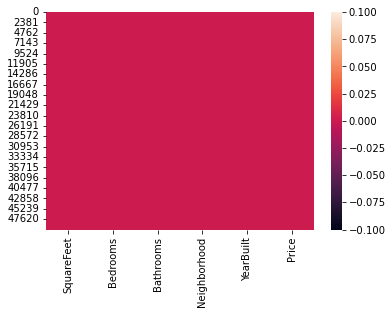

In [8]:
sns.heatmap(df.isnull())

[]

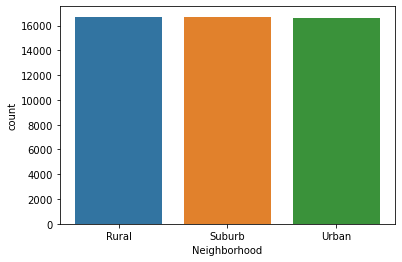

In [9]:
sns.countplot(x=df["Neighborhood"])
plt.plot()

In [38]:
df["Neighborhood"]=df["Neighborhood"].replace({'Rural':1,'Urban':3,'Suburb':2})
df['age']=datetime.now().year-df['YearBuilt']
df=df.drop("YearBuilt", axis=1)
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,Price,age
0,2126,4,1,1,215355.283618,54
1,2459,3,2,1,195014.221626,43
2,1860,2,1,3,306891.012076,53
3,2294,2,1,2,206786.787153,27
4,2130,5,2,3,272436.239065,22
...,...,...,...,...,...,...
49973,1282,5,3,1,100080.865895,48
49974,2854,2,2,3,374507.656727,35
49975,2979,5,3,3,384110.555590,61
49976,2596,5,2,1,380512.685957,39


In [39]:
X_feature=df.columns.drop("Price").tolist()
X_feature

['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'age']

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SquareFeet,49978.0,2006.752551,575.350298,1000.00000,1514.00000,2008.000000,2506.000000,2999.000000
Bedrooms,49978.0,3.498659,1.116325,2.00000,3.00000,3.000000,4.000000,5.000000
Bathrooms,49978.0,1.995458,0.815859,1.00000,1.00000,2.000000,3.000000,3.000000
Neighborhood,49978.0,2.000960,0.817304,1.00000,1.00000,2.000000,3.000000,3.000000
Price,49978.0,224931.667960,75995.682992,154.77912,170007.48713,225100.123857,279395.826288,492195.259972
age,49978.0,37.595662,20.718407,2.00000,20.00000,38.000000,56.000000,73.000000


In [41]:
neg=df["Price"]<0
df.drop(df[neg].index,inplace=True)
df.reset_index(drop=True,inplace=True)
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,Price,age
0,2126,4,1,1,215355.283618,54
1,2459,3,2,1,195014.221626,43
2,1860,2,1,3,306891.012076,53
3,2294,2,1,2,206786.787153,27
4,2130,5,2,3,272436.239065,22
...,...,...,...,...,...,...
49973,1282,5,3,1,100080.865895,48
49974,2854,2,2,3,374507.656727,35
49975,2979,5,3,3,384110.555590,61
49976,2596,5,2,1,380512.685957,39


In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SquareFeet,49978.0,2006.752551,575.350298,1000.00000,1514.00000,2008.000000,2506.000000,2999.000000
Bedrooms,49978.0,3.498659,1.116325,2.00000,3.00000,3.000000,4.000000,5.000000
Bathrooms,49978.0,1.995458,0.815859,1.00000,1.00000,2.000000,3.000000,3.000000
Neighborhood,49978.0,2.000960,0.817304,1.00000,1.00000,2.000000,3.000000,3.000000
Price,49978.0,224931.667960,75995.682992,154.77912,170007.48713,225100.123857,279395.826288,492195.259972
age,49978.0,37.595662,20.718407,2.00000,20.00000,38.000000,56.000000,73.000000


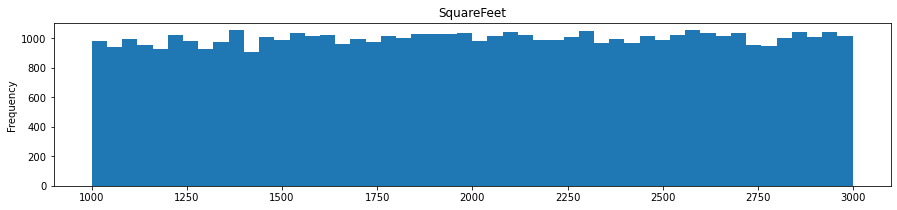

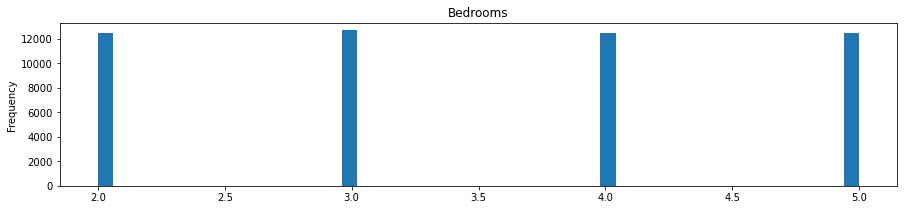

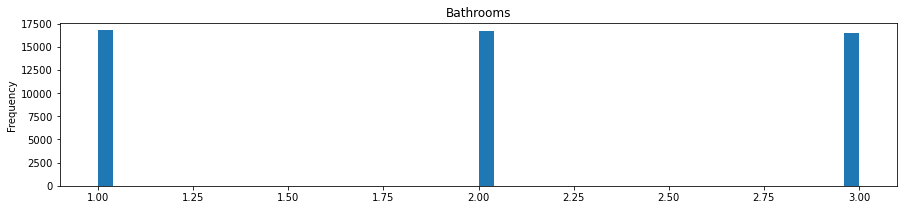

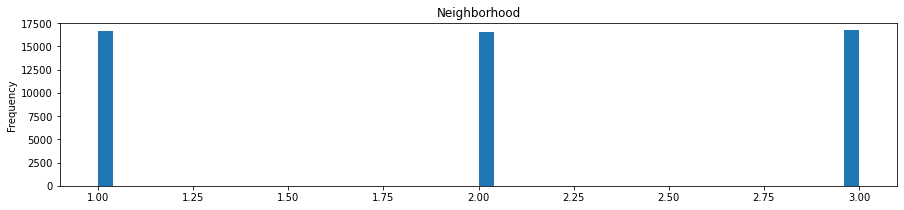

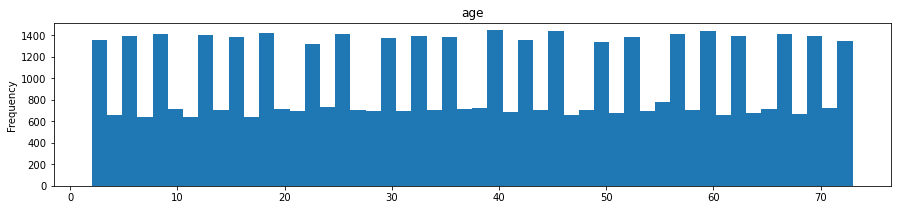

In [43]:
for f in X_feature:
    plt.figure(figsize=(15,3))
    df[f].plot(kind="hist",bins=50)
    plt.title(f)
    plt.show()

In [44]:
for f in X_feature:
    print("skewness: %f"%df[f].skew())
    print("Kurtois:%f"%df[f].kurt())

skewness: -0.011576
Kurtois:-1.189532
skewness: 0.004700
Kurtois:-1.356054
skewness: 0.008338
Kurtois:-1.497607
skewness: -0.001766
Kurtois:-1.502962
skewness: -0.005585
Kurtois:-1.196774


<AxesSubplot:>

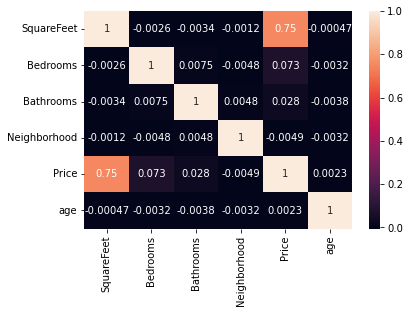

In [86]:
corr=df.corr(method='pearson')
sns.heatmap(corr,annot=True)

# Modelling

In [98]:
X=df.drop('Price',axis=1)
Y=df['Price']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [99]:
model_lg=LinearRegression()
model_lg.fit(X_train,Y_train)

LinearRegression()

In [100]:
Y_pred_lg=model_lg.predict(X_test)

In [101]:
print(f'mae: {mean_absolute_error(Y_test,Y_pred_lg)}')
print(f'medAe: {median_absolute_error(Y_test,Y_pred_lg)}')
print(f'r2: {r2_score(Y_test,Y_pred_lg)}')

mae: 39512.70096360757
medAe: 33453.78008853056
r2: 0.5777021497486377


In [102]:

import xgboost as xg
from xgboost import XGBRegressor

model_xgb = XGBRegressor()




model_xgb.fit(X_train,Y_train)
Y_pred_xg=model_xgb.predict(X_test)
print(f'mae: {mean_absolute_error(Y_test,Y_pred_xg)}')
print(f'medAe: {median_absolute_error(Y_test,Y_pred_xg)}')
print(f'r2: {r2_score(Y_test,Y_pred_xg)}')

mae: 40245.192536993556
medAe: 33813.96612125507
r2: 0.560043490662891


In [103]:
from sklearn.ensemble import GradientBoostingRegressor

model_gbr = GradientBoostingRegressor(random_state=42)




model_gbr.fit(X_train,Y_train)
Y_pred_gb=model_gbr.predict(X_test)
print(f'mae: {mean_absolute_error(Y_test,Y_pred_gb)}')
print(f'medAe: {median_absolute_error(Y_test,Y_pred_gb)}')
print(f'r2: {r2_score(Y_test,Y_pred_gb)}')

mae: 39514.91507591195
medAe: 33395.50930411862
r2: 0.5774353744180164


In [104]:
from sklearn.svm import SVR

model_sv = SVR()

model_sv.fit(X_train,Y_train)
Y_pred_sv=model_sv.predict(X_test)
print(f'mae: {mean_absolute_error(Y_test,Y_pred_sv)}')
print(f'medAe: {median_absolute_error(Y_test,Y_pred_sv)}')
print(f'r2: {r2_score(Y_test,Y_pred_sv)}')

mae: 59900.53701408964
medAe: 52167.84523623907
r2: 0.06792314306895741


In [106]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train,Y_train)
Y_pred_rf=model_rf.predict(X_test)
print(f'mae: {mean_absolute_error(Y_test,Y_pred_rf)}')
print(f'medAe: {median_absolute_error(Y_test,Y_pred_rf)}')
print(f'r2: {r2_score(Y_test,Y_pred_rf)}')


mae: 41890.20206383739
medAe: 35249.8112035511
r2: 0.523223857710091
